# About Dataset:-

### Let’s consider a Company dataset with around 10 variables and 400 records. 
### The attributes are as follows: 
###  Sales -- Unit sales (in thousands) at each location
###  Competitor Price -- Price charged by competitor at each location
###  Income -- Community income level (in thousands of dollars)
###  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
###  Population -- Population size in region (in thousands)
###  Price -- Price company charges for car seats at each site
###  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
###  Age -- Average age of the local population
###  Education -- Education level at each location
###  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
###  US -- A factor with levels No and Yes to indicate whether the store is in the US or not
### The company dataset looks like this: 
 

#  Problem Statement:
#### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
#### Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other 
#### variable will be independent in the analysis.

In [2]:
#### Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

#### Getting the data
def read_data():
    try:
        data = pd.read_csv("C:/Data Science/Nov 2023/19 Nov 2023/Random Forest Project 9 & 10/10. Random Forests/Company_Data.csv")
        return data
    except Exception as e:
        print("Data Path Not Found and Error is in the Read Data Function")

#### Calling the read data function
df = read_data()
# print(df.head())

#### Preprocessing and Feature Engineering
df1 = df.copy()
# print(df1.head())
# print(df1.info())
# print(df1.shape)

# df1.isnull().sum()

# df1.select_dtypes(include='number').columns

# df1.select_dtypes(include='object').columns

# for i in ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
#        'Age', 'Education']:
#     sns.boxplot(data = df1,x = i)
#     plt.show()

# for i in [ 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
#        'Age', 'Education']:
#     sns.regplot(data = df1,x = i,y = 'Sales' )
#     plt.show()

col = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education']

def wisker (col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower,upper

for i in col:
    lower,upper = wisker(df1[i])
    df1[i] = np.where(df1[i]<lower,lower,df1[i])
    df1[i] = np.where(df1[i]>upper,upper,df1[i])

# for i in ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
#        'Age', 'Education']:
#     sns.boxplot(data = df1,x = i)
#     plt.show()

# for i in df1.select_dtypes("number"):
#     sns.histplot(data = df1,x = i,kde = True)
#     plt.show()

# for i in df1.select_dtypes("object"):
#     sns.histplot(data = df1,x = i,kde = True)
#     plt.show()

# for i in [ 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
#        'Age', 'Education']:
#     sns.scatterplot(data = df1,x = i,y = 'Sales',hue = 'ShelveLoc' )
#     plt.show()

# for i in [ 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
#        'Age', 'Education']:
#     sns.scatterplot(data = df1,x = i,y = 'Sales',hue = 'Urban' )
#     plt.show()

# for i in [ 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
#        'Age', 'Education']:
#     sns.scatterplot(data = df1,x = i,y = 'Sales',hue = 'US' )
#     plt.show()

# for i in [ 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
#        'Age', 'Education']:
#     sns.regplot(data = df1,x = i,y = 'Sales' )
#     plt.show()

# df1.columns

df1['ShelveLoc'] = df1['ShelveLoc'].replace(('Bad','Medium','Good'),(0,1,2))

df1['Urban'] = df1['Urban'].replace(('Yes','No'),(0,1))

df1['US'] = df1['US'].replace(('Yes','No'),(0,1))

# df1 =pd.get_dummies(df1[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
#        'ShelveLoc', 'Age', 'Education', 'Urban', 'US']],drop_first=True)

bins = [-float('inf'),5,10,float('inf')]
labels = ['Bad','Medium','Good']

df1['Sales'] = pd.cut(df['Sales'],bins = bins,labels = labels,right = False)

df1['Sales'] = df1['Sales'].replace(('Bad','Medium','Good'),(0,1,2))

# independent

# final_data = pd.concat([df1,independent,target],axis = 1)

# final_data

# final_data.columns

# final_data.drop(["ShelveLoc","Urban","US"],axis = 1,inplace=True)

def data_prep(df1,t):
    X = df1[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
           'ShelveLoc', 'Age', 'Education', 'Urban','US']]
    y = df1['Sales']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=t,random_state=365)
    return X_train,X_test,y_train,y_test

def rndf_tree(X_train,X_test,y_train):
    model = RandomForestClassifier(criterion="entropy",max_depth=5)
    model_fit = model.fit(X_train,y_train)
    pred = model_fit.predict(X_test)
    return pred

def rndf_tree_diag(y_test,pred):
    acc = accuracy_score(y_test,pred)
    clf = classification_report(y_test,pred)
    return acc,clf 

def main_function():
    df1
    X_train,X_test,y_train,y_test = data_prep(df1,0.1)
    pred = rndf_tree(X_train,X_test,y_train)
    acc,clf = rndf_tree_diag(y_test,pred)
    return clf

results = main_function()
print(results)

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.84      0.93      0.89        29
           2       0.71      0.71      0.71         7

    accuracy                           0.82        40
   macro avg       0.85      0.63      0.67        40
weighted avg       0.84      0.82      0.81        40



In [60]:
a = df.select_dtypes(include='object').columns

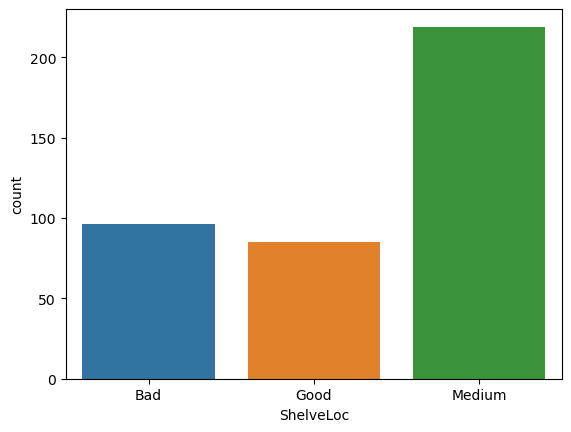

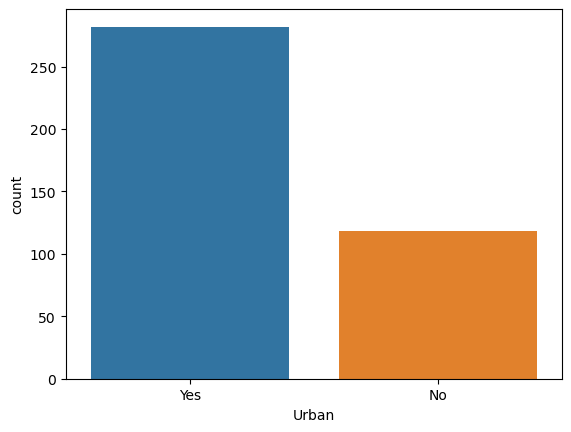

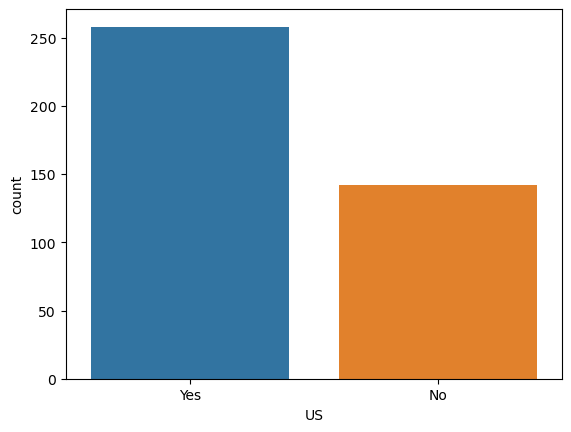

In [63]:
for i in a:
    sns.countplot(data=df,x=i)
    plt.show()

In [5]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

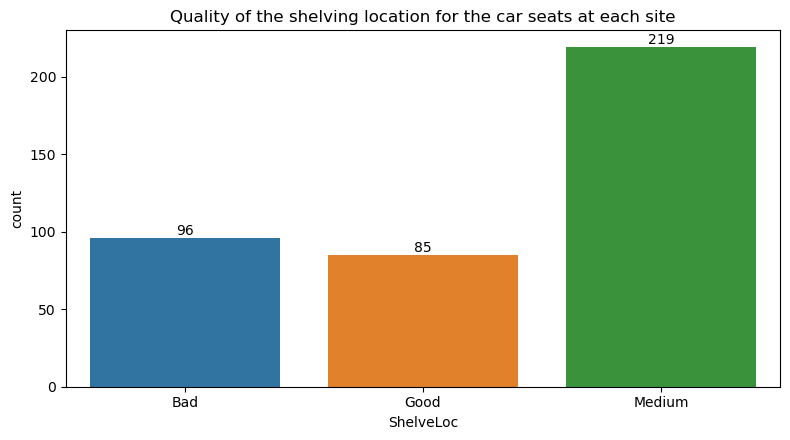

In [6]:
plt.figure(figsize=(8,4.5))
ax = sns.countplot(data=df,x='ShelveLoc')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Quality of the shelving location for the car seats at each site')
plt.tight_layout()
plt.show()

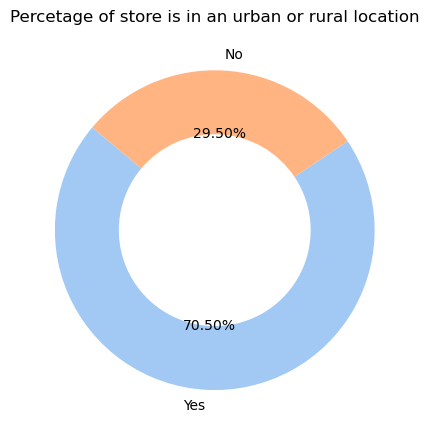

In [7]:
plt.figure(figsize=(8,4.5))
type_value_counts = df['Urban'].value_counts().head()
colors = sns.color_palette('pastel',len(type_value_counts))
plt.pie(type_value_counts,labels=type_value_counts.index,
       autopct='%1.2f%%',startangle=140,colors=colors,wedgeprops=dict(width=0.4))
plt.title('Percetage of store is in an urban or rural location')
plt.tight_layout()
plt.show()

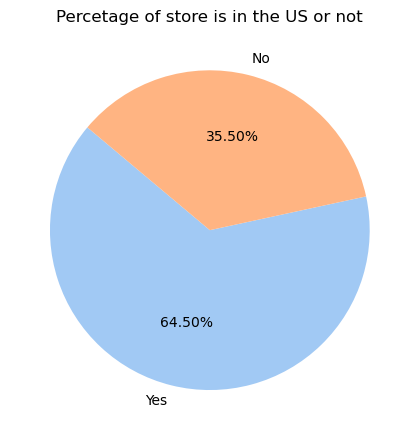

In [8]:
plt.figure(figsize=(8,4.5))
type_value_counts = df['US'].value_counts().head()
colors = sns.color_palette('pastel',len(type_value_counts))
plt.pie(type_value_counts,labels=type_value_counts.index,
       autopct='%1.2f%%',startangle=140,colors=colors,wedgeprops=None)
plt.title('Percetage of store is in the US or not')
plt.tight_layout()
plt.show()

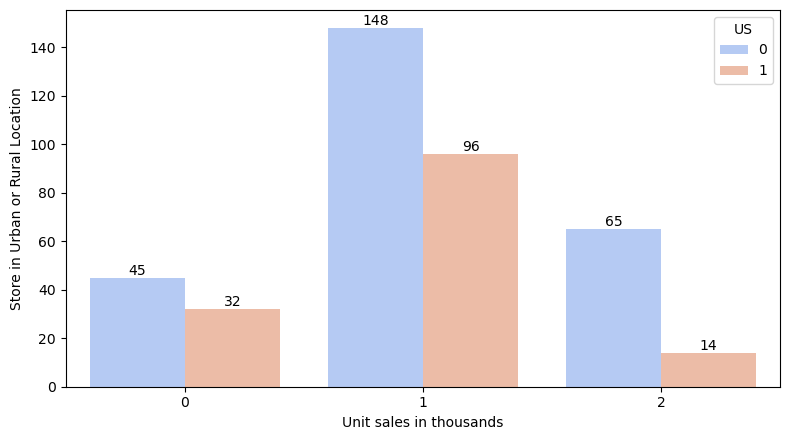

In [9]:
plt.figure(figsize=(8,4.5))
ax = sns.barplot(data=df1,x='Sales',y='Urban',errorbar=None,estimator='count',hue='US',palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('')
plt.xlabel('Unit sales in thousands')
plt.ylabel('Store in Urban or Rural Location')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

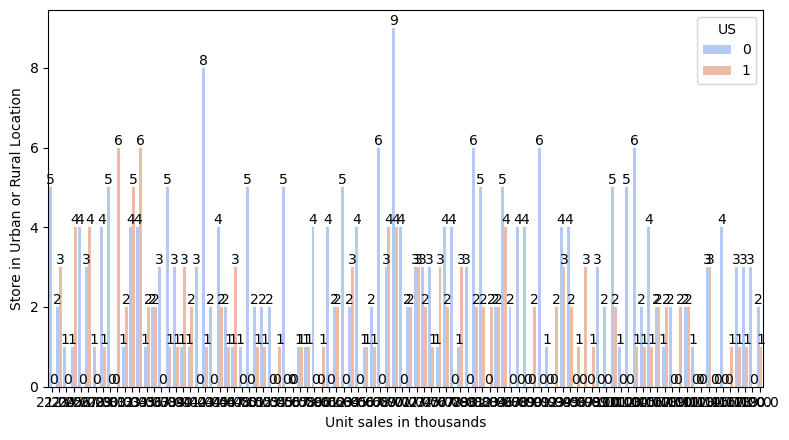

In [10]:
plt.figure(figsize=(8,4.5))
ax = sns.barplot(data=df1,x='Income',y='ShelveLoc',errorbar=None,estimator='sum',palette='coolwarm',hue='US')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('')
plt.xlabel('Unit sales in thousands')
plt.ylabel('Store in Urban or Rural Location')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

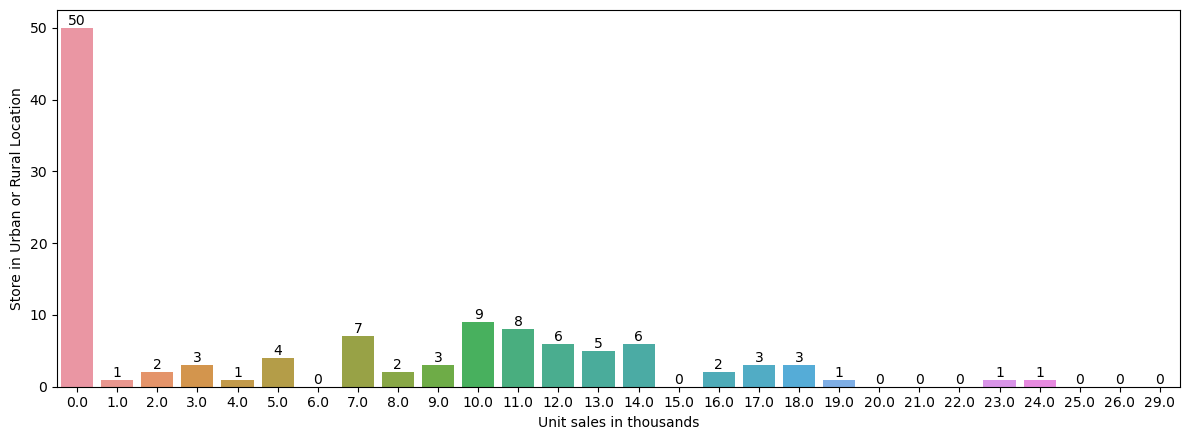

In [11]:
plt.figure(figsize=(12,4.5))
ax = sns.barplot(data=df1,x='Advertising',y='Urban',errorbar=None,estimator='sum')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('')
plt.xlabel('Unit sales in thousands')
plt.ylabel('Store in Urban or Rural Location')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [12]:
df1['Advertising'].value_counts()

0.0     144
10.0     25
11.0     22
13.0     20
5.0      19
7.0      16
12.0     16
3.0      14
4.0      12
15.0     12
16.0     11
8.0      11
14.0     11
9.0      10
2.0       9
19.0      8
1.0       8
6.0       7
17.0      6
18.0      6
20.0      4
23.0      2
22.0      2
24.0      1
25.0      1
26.0      1
29.0      1
21.0      1
Name: Advertising, dtype: int64

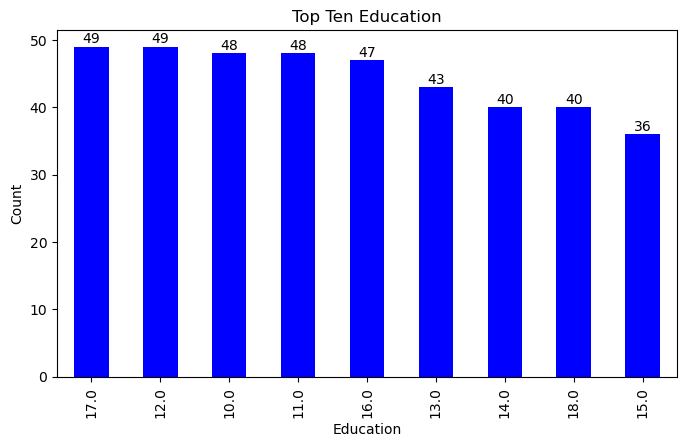

In [13]:
plt.figure(figsize=(8,4.5))
education_value_counts = df1['Education'].value_counts()
education_value_counts.head(10).plot(kind='bar', color='Blue')
plt.title('Top Ten Education')
plt.xlabel('Education')
plt.ylabel('Count')
for index, value in enumerate(education_value_counts.head(10)):
     plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()


In [14]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [15]:
numeric = df.select_dtypes(include='number').columns

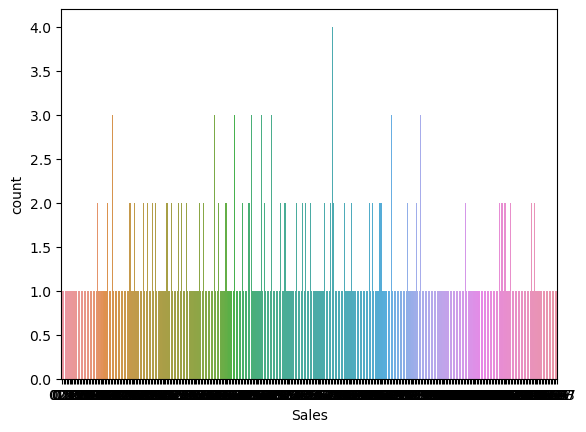

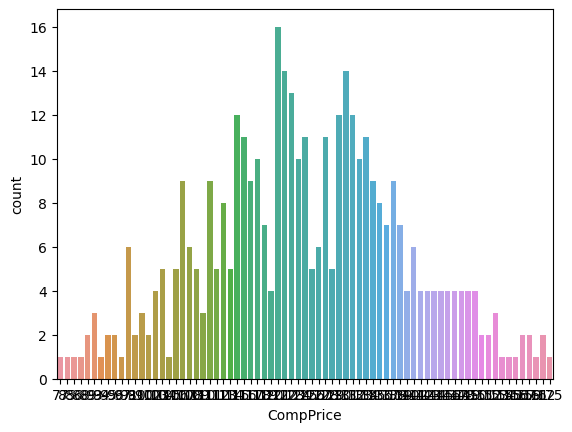

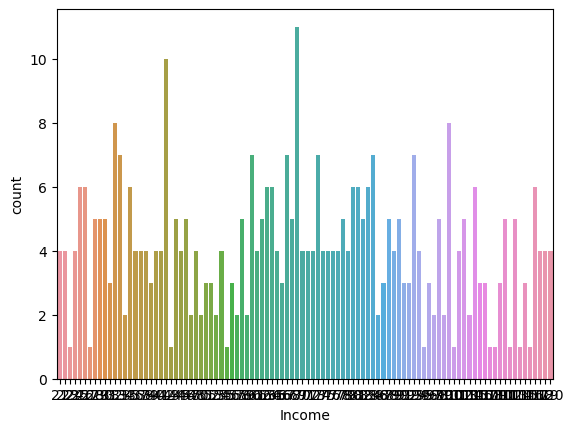

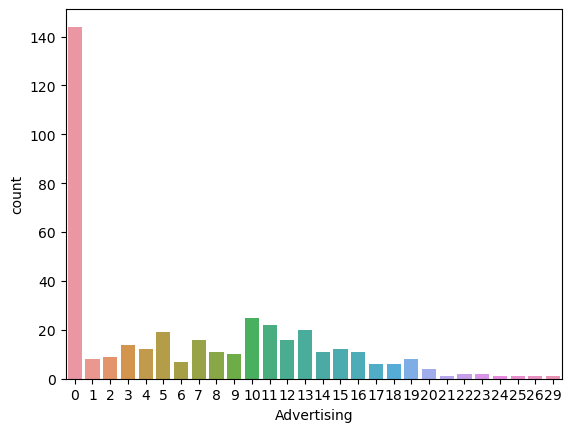

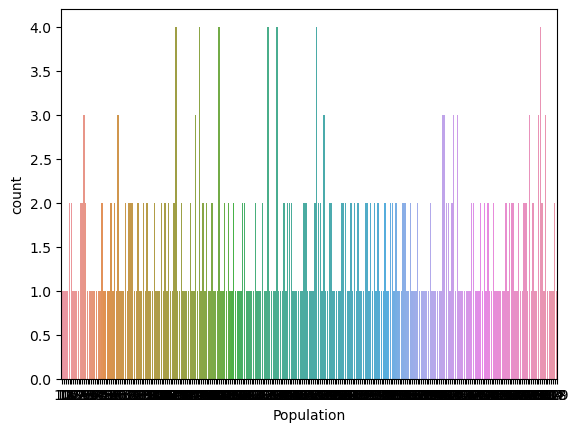

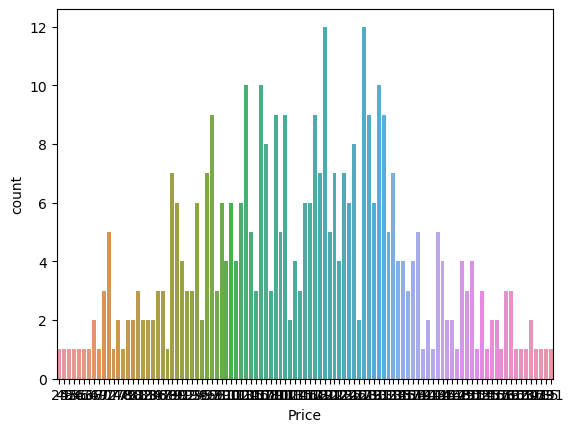

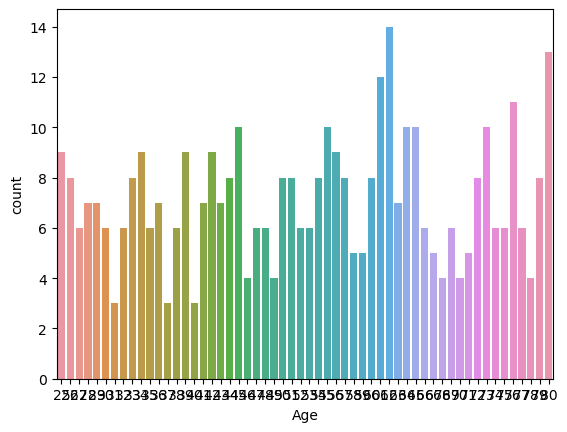

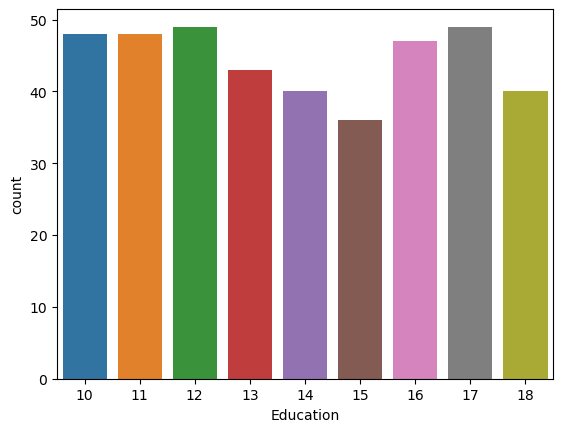

In [16]:
for i in['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education']:
    plt.subplot = (3,3)
    sns.countplot(data=df,x=i)
    plt.show()

In [17]:
#function to visualise { Categorical VAriables }
import matplotlib.ticker as ticker
def cat_var_eda(df,features):
    """
    [ Univariate Analysis For Categorical Variables ]
        Will take a group of variables-[CATEGORY] and will plot or print: 
            1. Bar Plot 
            2. value_counts
    """
    #setting figure size and all
    fig_size = len(features)
    fig = plt.figure(figsize=(10*fig_size,4),dpi=100)
    fig.canvas.draw()
    plt.tight_layout(pad=1.08,h_pad=None,w_pad=100000,rect=None)
    
    for index,values in enumerate(features):
        plt.subplot(1, fig_size, index + 1)
        ax = sns.countplot(x=values, data=df, orient='h') #horizontal countplot
        plt.xlabel(f"{values}", fontsize=12)
        
        not_null_count = df.shape[0] - pd.isnull(df[values]).sum()
        
        #twin axis formation
        ax2 = ax.twinx()
        #count axis on right, frequency on left
        ax2.yaxis.tick_left()
        ax.yaxis.tick_right()
        #also switching labels over
        ax.yaxis.set_label_position('right')
        ax2.yaxis.set_label_position('left')
        
        ax2.set_ylabel('Frequency [%]')
        
        for p in ax.patches:
            x = p.get_bbox().get_points()[:,0]
            y = p.get_bbox().get_points()[1,1]
            ax.annotate('{:.1f}'.format(100. * y / not_null_count), 
                        (x.mean(),y), ha='center', va='bottom') #setting text allignment
        
        #using a LinearLocator to ensure correct number of ticks
        ax.yaxis.set_major_locator(ticker.LinearLocator(11))
        ax.set_ylim(0,not_null_count)
        ax2.set_ylim(0,180)
        #tick spacing of 10
        ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
        ax2.grid(alpha=0.3)
        
        plt.show

In [18]:
# import itertools
# cols = ['ShelveLoc', 'Urban', 'US']
# for i in cols:
#     cat_var_eda(df,[i])
#     plt.show()

In [19]:
numeric = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education']
corr = df[numeric].corr()
df[numeric].describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<Axes: >

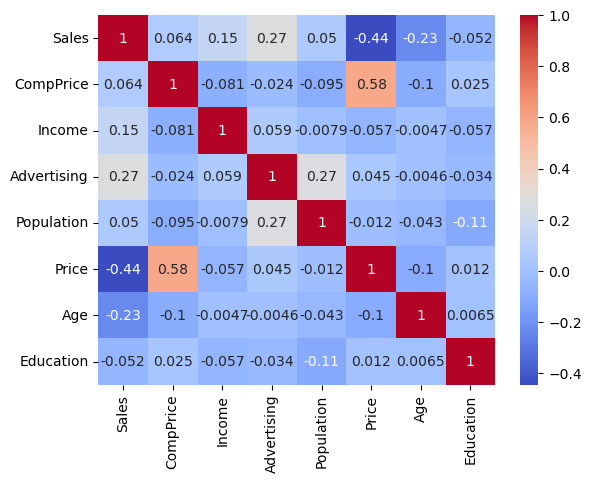

In [20]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [21]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [36]:
col = df.select_dtypes(include='number').columns
col

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

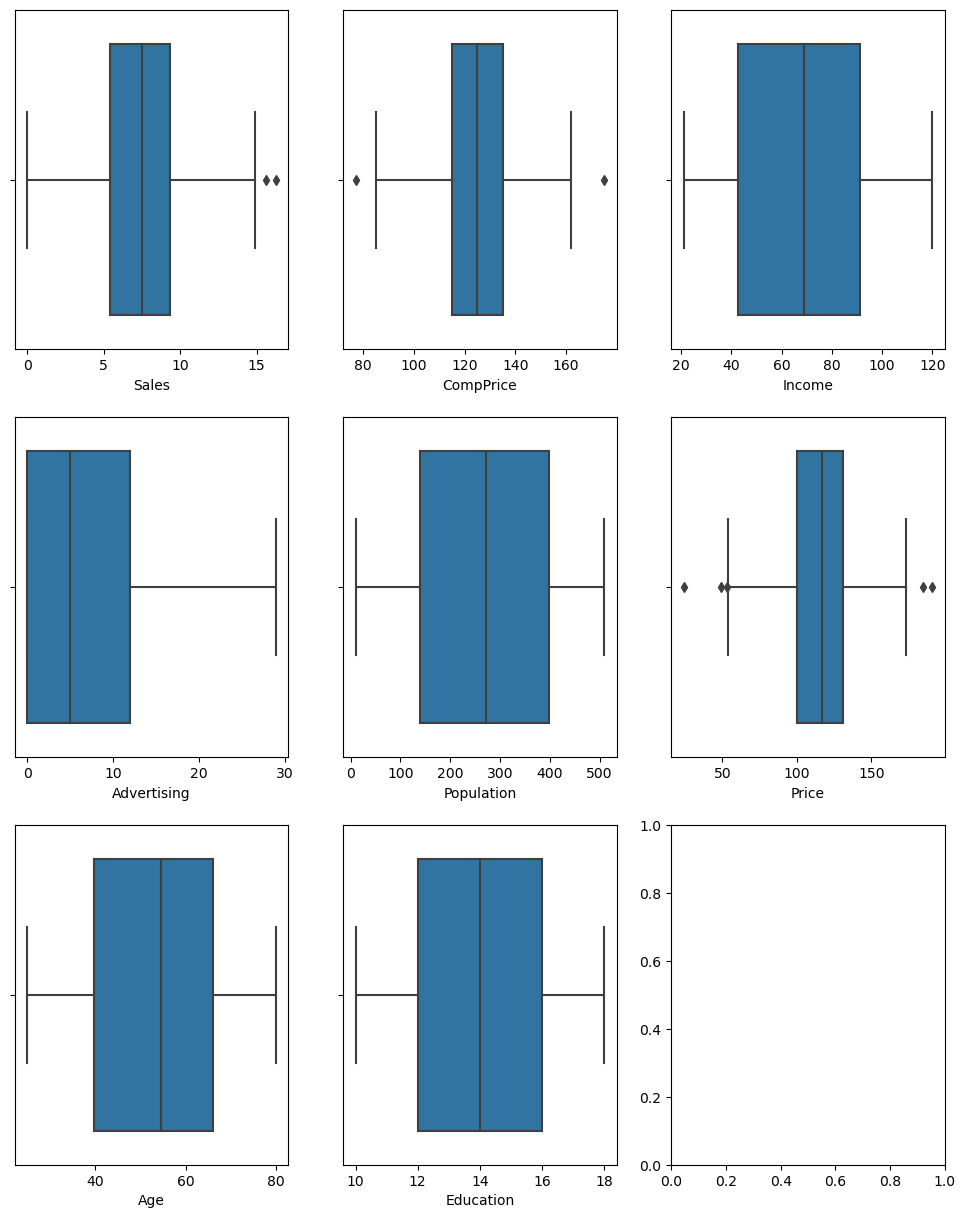

In [37]:
import warnings
warnings.filterwarnings('ignore')
fig,axes = plt.subplots(3,3,figsize=(12,15))
for idx,cat_col in enumerate(col):
    row,col = idx//3,idx%3
    sns.boxplot(x=cat_col,data=df,ax=axes[row,col])
plt.show()

<Axes: >

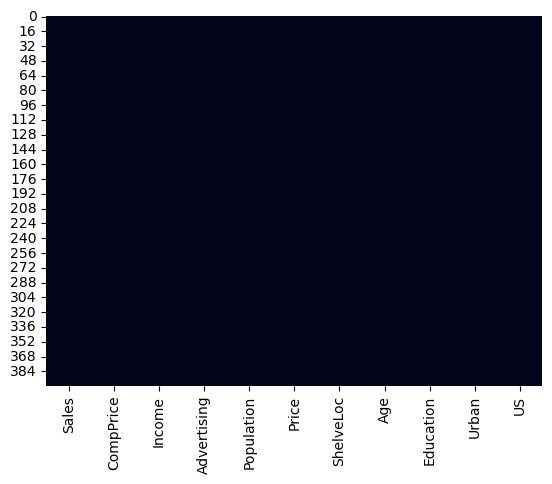

In [38]:
sns.heatmap(df.isnull(),cbar=False)

In [44]:
def wisker(cols):
    q1,q3 = np.percentile(cols,[25,75])
    iqr = q3 - q1
    lower = q1 - iqr * 1.5
    upper = q3 + iqr * 1.5
    return lower,upper

In [47]:
for i in numeric:
    lower,upper = wisker(df[i])
    df[i] = np.where(df[i]<lower,lower,df[i])
    df[i] = np.where(df[i]>upper,upper,df[i])

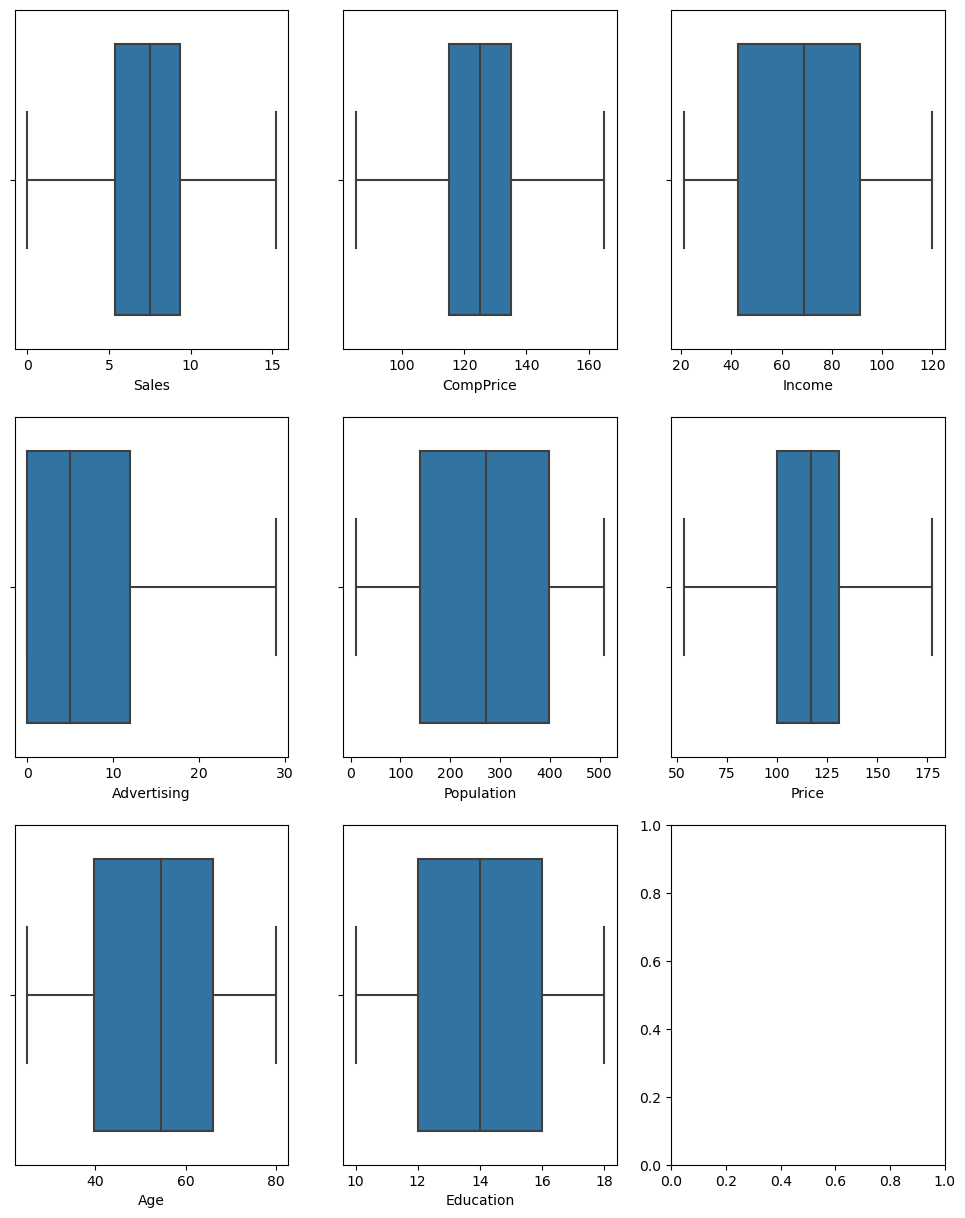

In [49]:
import warnings
warnings.filterwarnings('ignore')
fig,axes = plt.subplots(3,3,figsize=(12,15))
for idx,cat_col in enumerate(numeric):
    row,col = idx//3,idx%3
    sns.boxplot(x=cat_col,data=df,ax=axes[row,col])
plt.show()

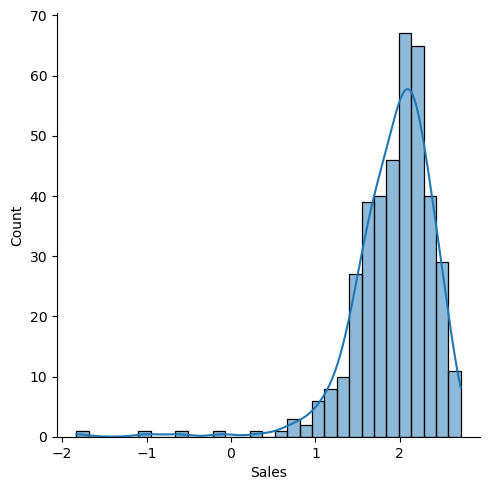

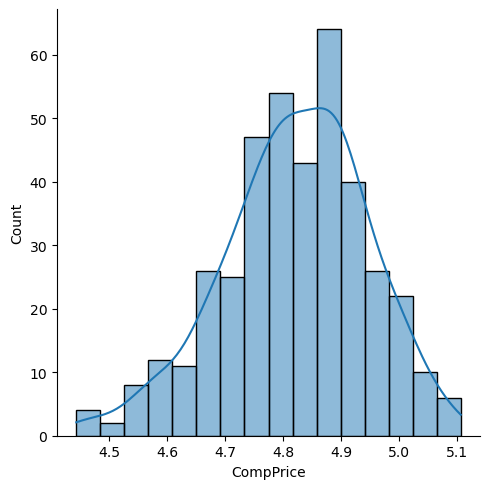

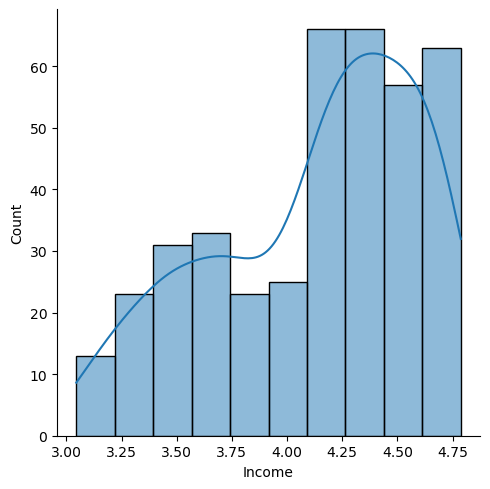

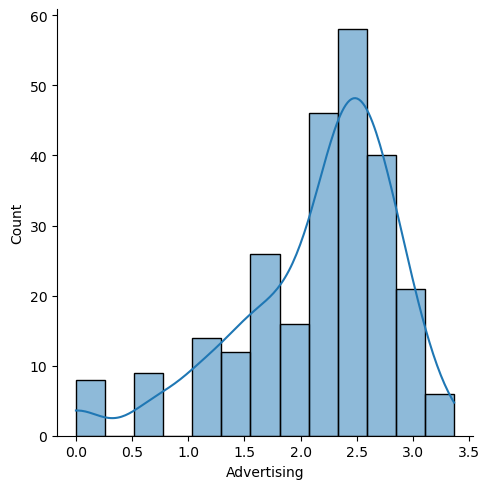

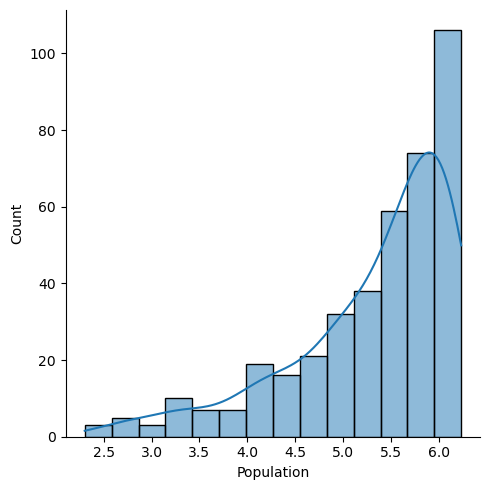

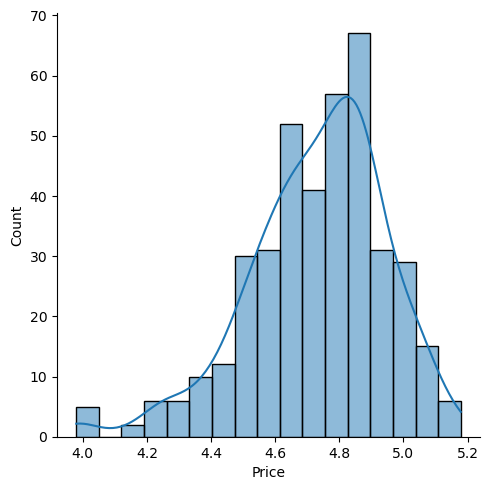

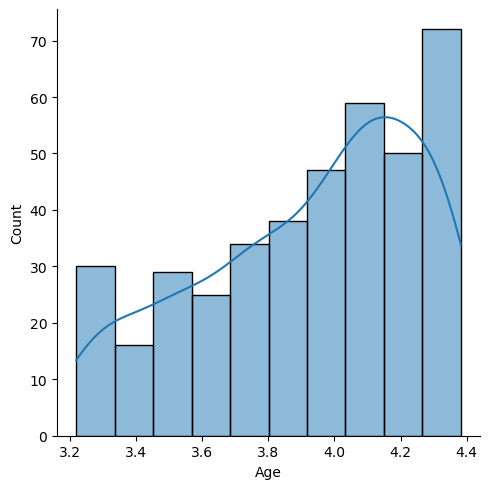

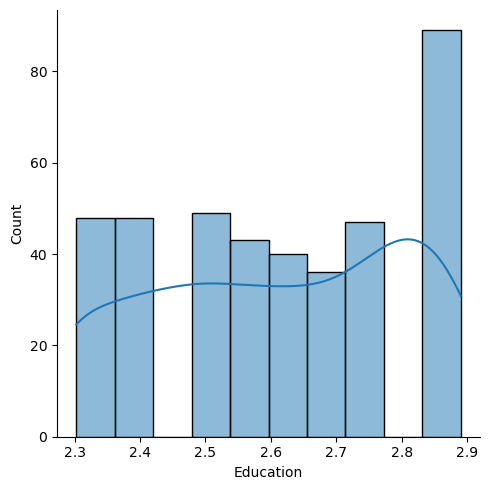

In [58]:
col = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education']
for i in col:
    sns.displot(data=df,x=i,kde=True)
plt.show()

In [54]:
# Log Transformation
col = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education']
for i in col:
    df[i] = np.log(df[i])

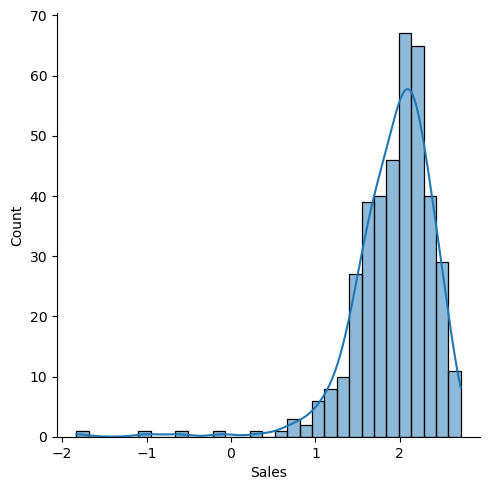

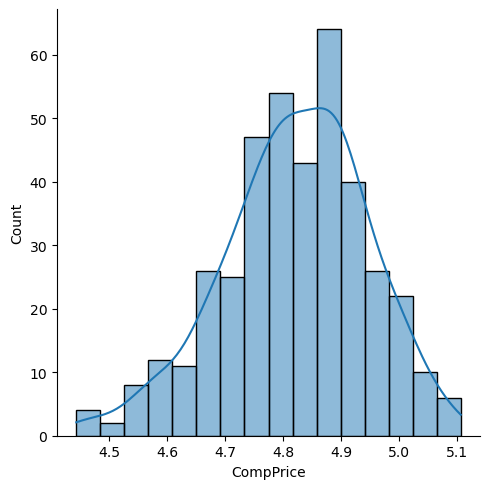

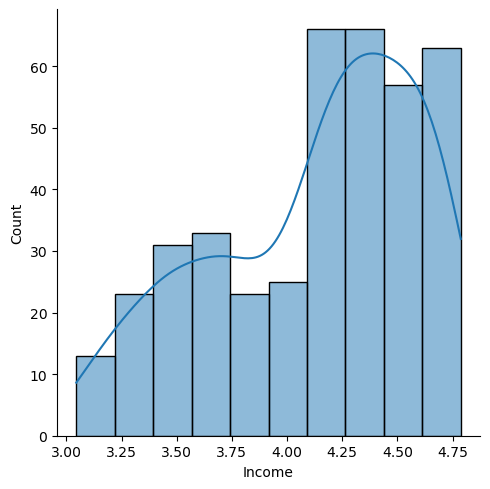

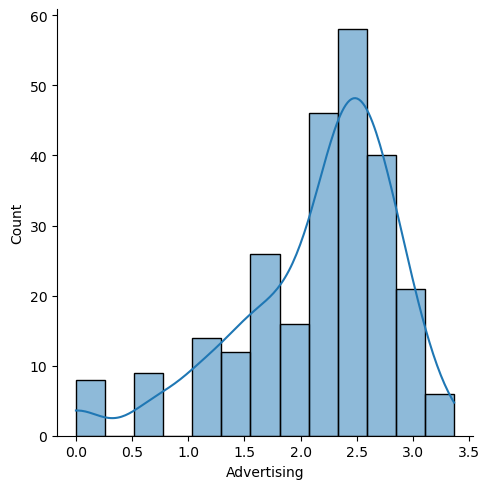

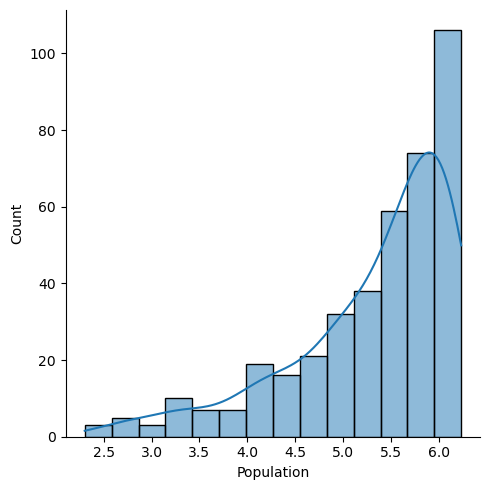

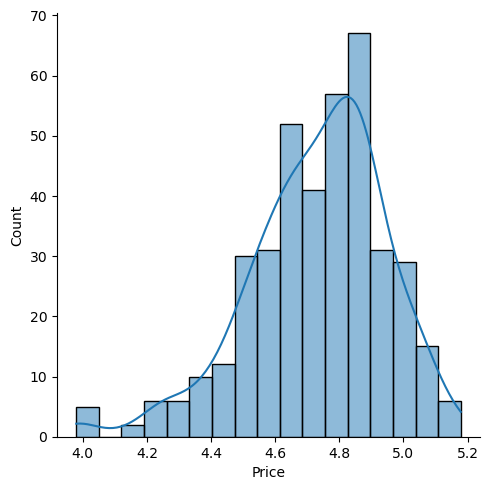

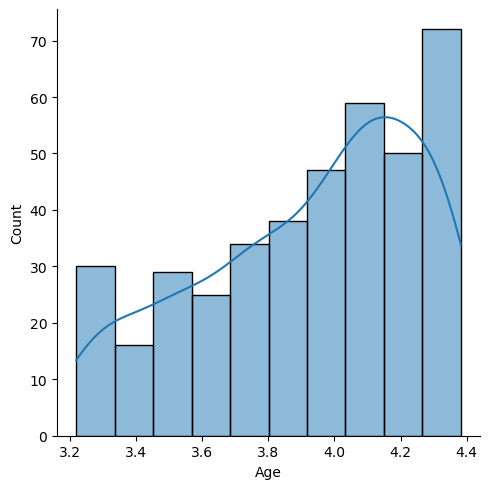

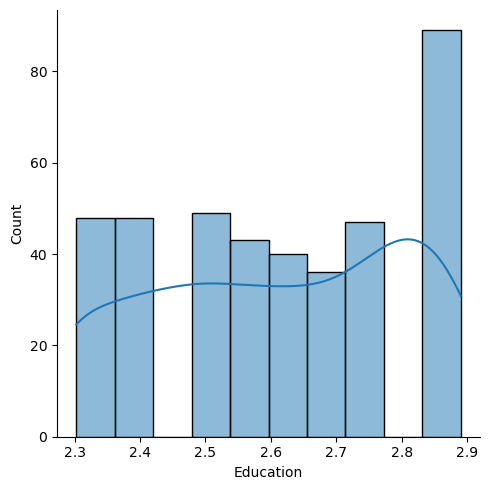

In [55]:
for i in col:
    sns.displot(x =i,data = df,kde=True)
    plt.show()

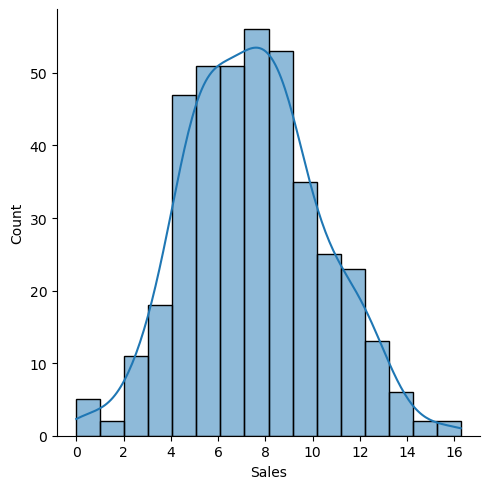

In [28]:
sns.displot(x = 'Sales',data = df,kde=True)